# Mexican Stocks Data Analysis

## Description

In this project I will analyse the stock value from two of the most important mexican food companies: Industrias [Bachoco, S.A.B. de C.V.](http://www.bachoco.com.mx/) (_BACHOCOB.MX_) and [Grupo Bimbo, S.A.B. de C.V](http://www.grupobimbo.com) (_BIMBOA.MX_). Both companies area headquarted in Mexico and play as ETF (_exchange-traded funds_) in the mexican stock market. Note that the prices are given in U.S. Dollars.

For this analysis I will use the following software: 

* __Python 2.7 (Anaconda version)__ as main programming language.
* __The Python's libraries Pandas and Numpy__ for data analysis
* __The Python's libraries Seabonrn and Matplotlib__ for data visualization.
* __Ubuntu 16.04__ as operating system.

In [1]:
# Last update
from datetime import datetime
print "Last Update: " + str(datetime.now())

Last Update: 2016-05-30 06:17:16.354674


In [2]:
# Initial imports
## For data analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# For showing plots inline
% matplotlib inline

# For reading stocks from Yahoo! Finance
from pandas.io.data import DataReader

# For division
from __future__ import division

/home/jarturomora/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


## Data Gathering and Analysis Set-Up

In the following section I will gather the stocks' data from Yahoo! Finance and I will set a frame of one year after today to conduct the analysis, therefore, the results would change in the future depending on which day the analysis code is executed.

In [3]:
# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of stock symbols to analyse
stock_sym = ['BACHOCOB.MX', 'BIMBOA.MX']

# Data gathering from Yahoo! Finance
symbols = {symbol:DataReader(symbol, 'yahoo', start, end) for symbol in stock_sym}

In [4]:
# Stocks sample data information
symbols['BACHOCOB.MX'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-01,74.50,75.14,72.58,72.79,582700,71.35390
2015-06-02,73.66,73.66,72.39,72.50,288500,71.06962
2015-06-03,73.00,73.29,72.38,72.48,246800,71.05002
2015-06-04,72.48,72.50,71.72,71.93,61800,70.51087
2015-06-05,72.00,72.00,71.33,71.57,199800,70.15797


In [5]:
symbols["BIMBOA.MX"].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-01,41.21,41.96,40.80,41.08,1306200,40.8852
2015-06-02,40.90,41.19,40.14,40.73,2314700,40.5369
2015-06-03,41.20,41.20,40.12,40.44,4030400,40.2483
2015-06-04,40.25,40.39,40.04,40.26,1985900,40.0691
2015-06-05,40.30,40.45,40.21,40.31,840600,40.1189


## Basic Data Analysis

I will start the analysis by plotting some line charts that will display the _adjusted close value_ and the _volume_ of each stock symbol.

In [6]:
# Function to create the analysis line plot
def stock_line_plot(symbol, indicator, data, ylabel):
    """Creates a line plot for basic stock symbol's indicator"""
    data[indicator].plot(legend = True, figsize = (12, 6))
    plt.title("%s Value for %s Along the Last Year" % (indicator, symbol), weight = 'bold')
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    ## Ploting the Max, Min, and Average value
    symbol_max_adj = data[indicator].max()
    symbol_min_adj = data[indicator].min()
    symbol_avg_adj = data[indicator].mean()
    plt.figtext(0.13, 0.85, "Max %0.2f" % symbol_max_adj)
    plt.axhline(y = symbol_max_adj, linewidth = 2, color = 'green')
    plt.figtext(0.13, 0.20, "Min %0.2f" % symbol_min_adj)
    plt.axhline(y = symbol_min_adj, linewidth = 2, color = 'red')
    plt.figtext(0.13, 0.50, "Avg %0.2f" % symbol_avg_adj)
    plt.axhline(y = symbol_avg_adj, linewidth = 2, color = 'orange')

### Data Analysis for _BACHOCOB.MX_

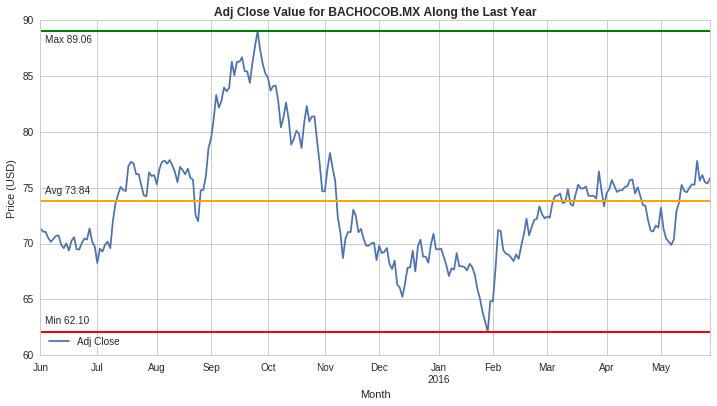

In [7]:
# Adjusted close value analysis
stock_line_plot('BACHOCOB.MX', 'Adj Close', symbols['BACHOCOB.MX'], 'Price (USD)')

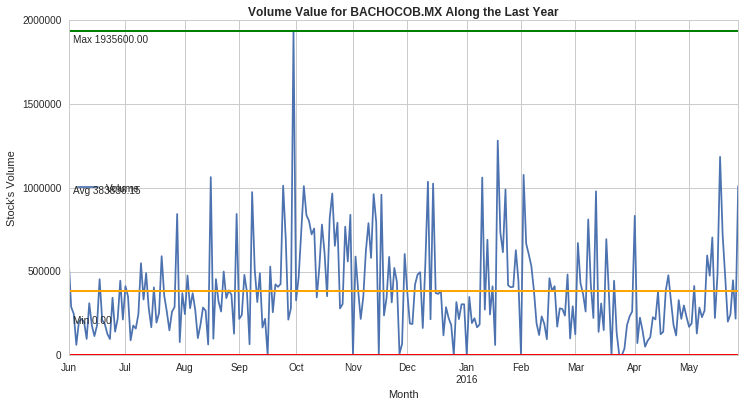

In [8]:
# Volume analysis
stock_line_plot('BACHOCOB.MX', 'Volume', symbols['BACHOCOB.MX'], "Stock's Volume")

### Data Analysis for _BIMBOA.MX_

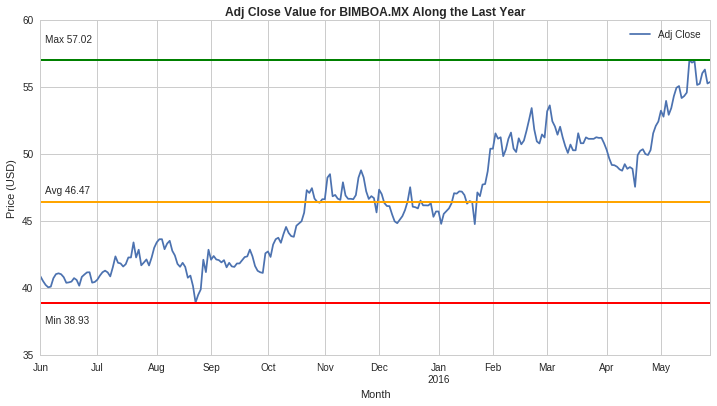

In [9]:
# Adjusted close value analysis
stock_line_plot('BIMBOA.MX', 'Adj Close', symbols['BIMBOA.MX'], 'Price (USD)')

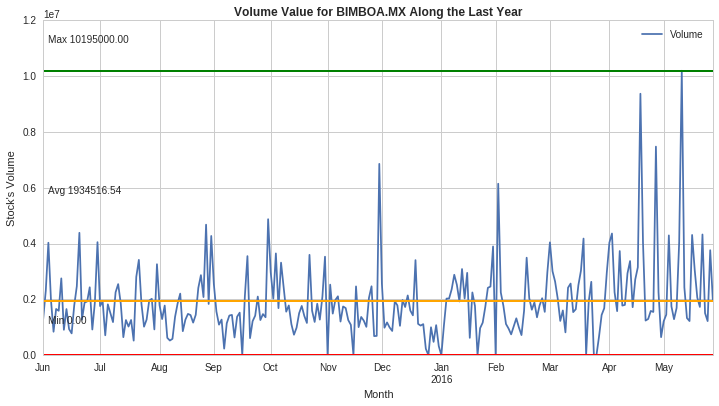

In [10]:
# Volume analysis
stock_line_plot('BIMBOA.MX', 'Volume', symbols['BIMBOA.MX'], "Stock's Volume")

### Comparing the Two Companies Adj Close

In [11]:
# Create a new data frame for closing stocks values only
closing_df = DataReader(stock_sym, 'yahoo', start, end)['Adj Close']

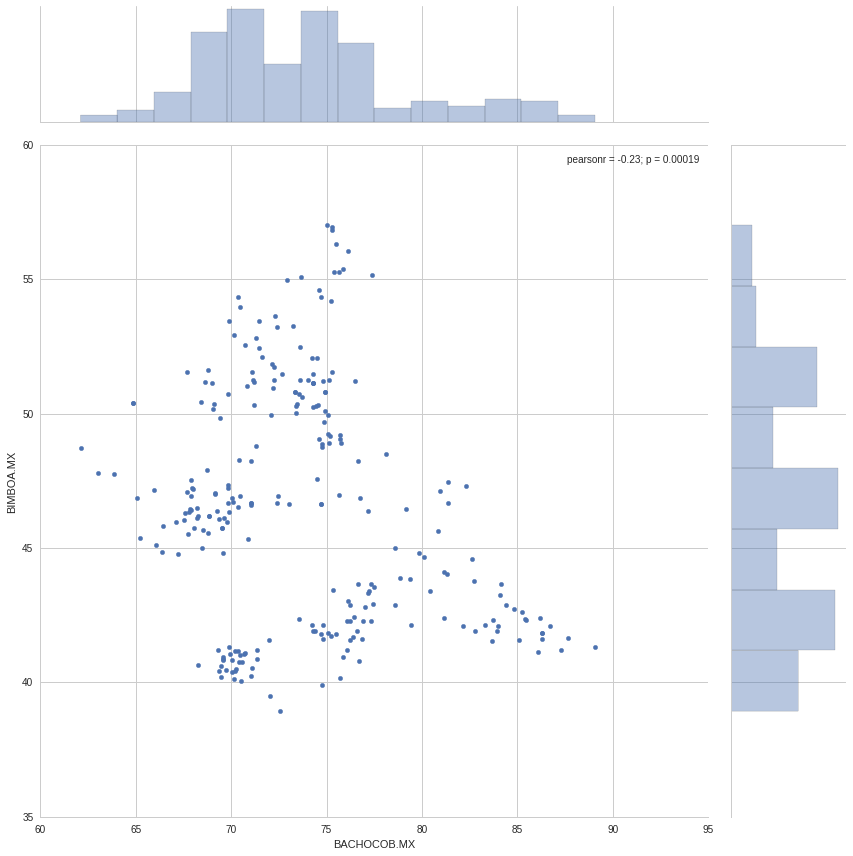

In [12]:
sns.jointplot(x = 'BACHOCOB.MX', y = 'BIMBOA.MX', data = closing_df, size = 12)

## Analysing Moving Averages (MA)



Now I wil caculate the moving average for the stock. For more info on the _moving average_ check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp
2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


In [13]:
# Function to calculate moving averages
def moving_averages(data, indicator, ma_days):
    for ma in ma_days:
        column_name = "MA for %s days" % (str(ma))
        # We calculate the "rolling mean" for the series of each MA
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
        # http://pandas.pydata.org/pandas-docs/stable/computation.html#rolling-windows
        data[column_name] = data[indicator].rolling(window = ma, center = False).mean()

In [14]:
# Define the moving averages to work with
ma_day = [10, 20, 50]

# Now we will add a new column to each dataframe with the MA information
## Moving averages for BACHOCOB.MX
moving_averages(symbols['BACHOCOB.MX'], 'Adj Close', ma_day)
## ## Moving averages for BIMBOA.MX
moving_averages(symbols['BIMBOA.MX'], 'Adj Close', ma_day)

In [15]:
# Function to plot Moving Averages
def plot_averages(data, ma_days, indicator, stock):
    # Define a list for the MA windows
    ma_windows = ['MA for %s days' % str(ma) for ma in ma_days]
    ma_windows.append(indicator)
    data[ma_windows[0:len(ma_windows)]].plot(figsize = (10, 4), subplots = False)
    plt.title("Moving Averages for %s" % stock)
    plt.ylabel("Price (USD)")

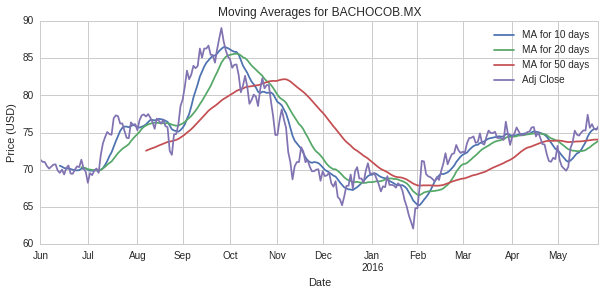

In [16]:
# Plot of moving averages for BACHOCOB.MX
plot_averages(symbols['BACHOCOB.MX'], ma_day, 'Adj Close', 'BACHOCOB.MX')

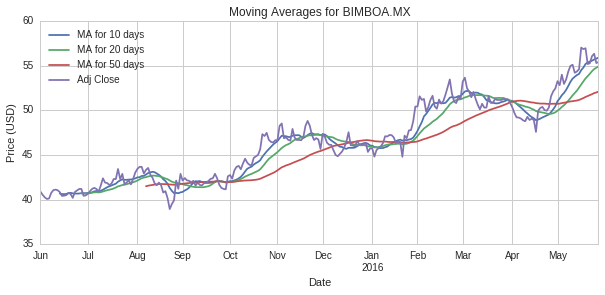

In [17]:
# Plot of moving averages for BIMBOA.MX
plot_averages(symbols['BIMBOA.MX'], ma_day, 'Adj Close', 'BIMBOA.MX')

## Analysis of Daily Return

Return on investment is a measure of investment performance used by both professional and novice investors alike. By dividing the loss or gain on the investment from one day by the original cost of the investment (day 1 market value), potential investors can compare investment opportunities by looking at the daily return percentage rate.

_Source:_ http://www.ehow.com/how_6453081_calculate-daily-return.html

In [18]:
# Function to calculate the daily return
def daily_retun(data, indicator):
    # I calculate the daily return using the pct_change method from Pandas' Series
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html
    data['Daily Return'] = data[indicator].pct_change()

In [19]:
# Calculate daily return for BACHOCOB.MX
daily_retun(symbols['BACHOCOB.MX'], 'Adj Close')

# Calculate daily return for BIMBOA.MX
daily_retun(symbols['BIMBOA.MX'], 'Adj Close')

In [20]:
# Function to ploy daily return
def plot_daily_return(data, indicator, stock):
    data[indicator].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')
    plt.title("Daily Return for %s" % stock)
    plt.ylabel("Daily Return (%)")

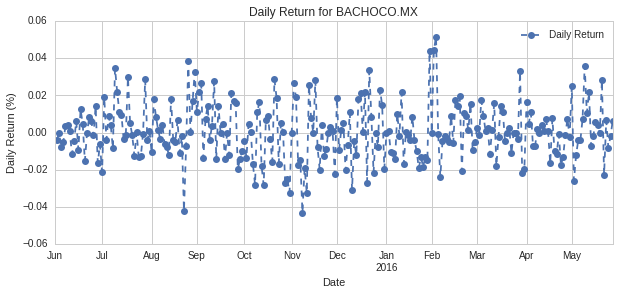

In [21]:
# Plot daily return for BACHOCOB.MX
plot_daily_return(symbols['BACHOCOB.MX'], 'Daily Return', 'BACHOCO.MX')

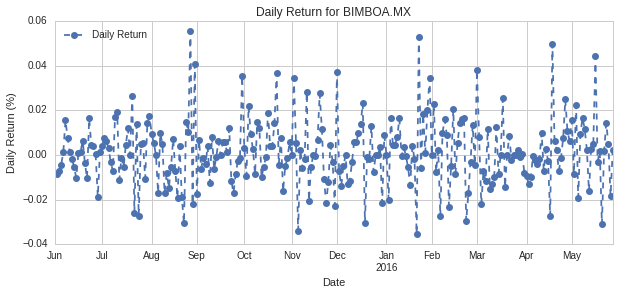

In [22]:
# Plot daily return for BIMBOA.MX
plot_daily_return(symbols['BIMBOA.MX'], 'Daily Return', 'BIMBOA.MX')

Following two histograms showing an overal look at the average daily return are presented. I used seaborn to create both a histogram and kde plot on the same figure.

In [23]:
# Function to create the histogram
def daily_return_histogram(data, indicator, stock):
    sns.distplot(data[indicator].dropna(), bins = 100, color = 'blue')
    plt.title("Histogram of %s Daily Return" % stock)
    plt.ylabel("Counts")

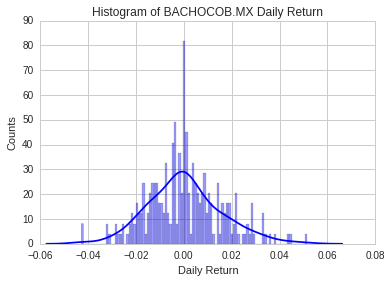

In [24]:
# Histogram for BACHOCOB.MX
daily_return_histogram(symbols['BACHOCOB.MX'], 'Daily Return', 'BACHOCOB.MX')

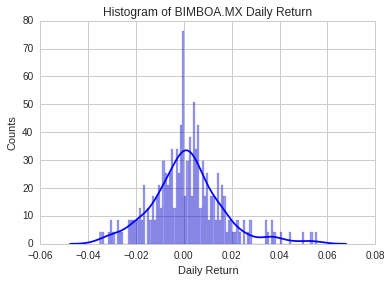

In [25]:
# Histogram for BIMBOA.MX
daily_return_histogram(symbols['BIMBOA.MX'], 'Daily Return', 'BIMBOA.MX')

## Closing Stock Price and Return for Stocks

Now I will analyze the returns of all the stocks in the stocks list.

In [26]:
# Create a new data frame only with the closing information
closing_df = DataReader(stock_sym, 'yahoo', start, end)['Adj Close']

In [27]:
closing_df.head(10)

,BACHOCOB.MX,BIMBOA.MX
Date,,
2015-06-01,71.35390,40.8852
2015-06-02,71.06962,40.5369
2015-06-03,71.05002,40.2483
2015-06-04,70.51087,40.0691
2015-06-05,70.15797,40.1189
2015-06-08,70.41284,40.7459
2015-06-09,70.68732,41.0544
2015-06-10,70.73633,41.1141
2015-06-11,69.91290,41.0445


In [28]:
# Create another data frame with the daily return of each stock symbol
stock_returns = closing_df.pct_change()

In [29]:
stock_returns.head(10)

,BACHOCOB.MX,BIMBOA.MX
Date,,
2015-06-01,NaN,NaN
2015-06-02,-0.003984,-0.008519
2015-06-03,-0.000276,-0.007119
2015-06-04,-0.007588,-0.004452
2015-06-05,-0.005005,0.001243
2015-06-08,0.003633,0.015629
2015-06-09,0.003898,0.007571
2015-06-10,0.000693,0.001454
2015-06-11,-0.011641,-0.001693


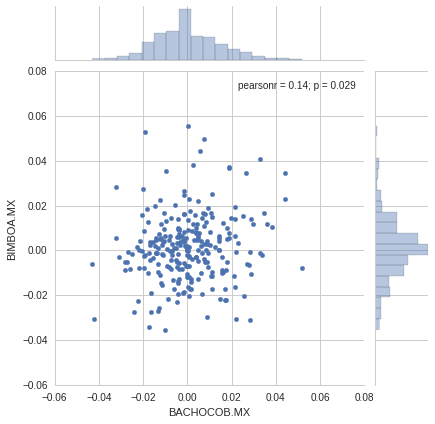

In [30]:
# Now I compare the daiyl percentage of return of the two stocks to check how correlated.
sns.jointplot('BACHOCOB.MX', 'BIMBOA.MX', stock_returns, kind = 'scatter')

## Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [31]:
# We create a dataset for the risk analysis using based on the closing values
returns = stock_returns.dropna()

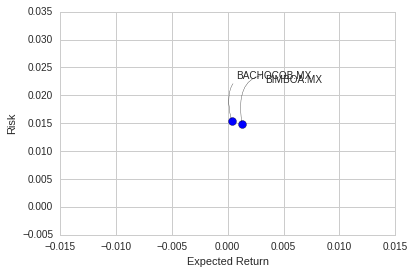

In [37]:
# Now we will create a scatter plot to analyse risk adding some fancy labels
area = np.pi * 20 # Radious of the plot's dots

# A scatter plot for risk analysis:
#    * the x-axis will be the mean of the daily returns (Expected return)
#    * the y-axis will be the standar deviation of the daily returns (Risk)
plt.scatter(returns.mean(), returns.std(), s = area)

# Axis labels
plt.xlabel("Expected Return")
plt.ylabel("Risk")

# Now the fancy labels
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (80, 40),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-", connectionstyle = "arc3, rad = 0.8")
    )

## Value at Risk (VaR)

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

More info: http://www.investopedia.com/terms/v/var.asp

### Method 1: Value at risk using the "bootstrap"

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile.

In [81]:
# Function to plot the VaR for a stock
def plot_value_risk(data, symbol, indicator):
    sns.distplot(data[indicator].dropna(), bins = 100, color = "blue")
    plt.title("Value at Risk for %s" % symbol)
    risk_line = data['Adj Close'].pct_change().dropna().quantile(0.05)
    plt.axvline(x = risk_line, color = "red")
    plt.figtext(0.15, 0.8, "Max Risk %0.2f%%" % (risk_line*100))

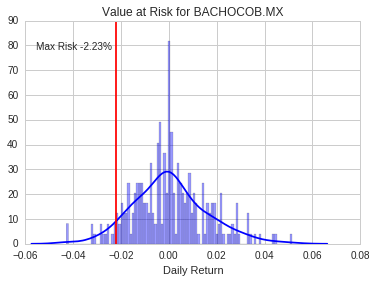

In [82]:
# Plotting value at risk for BACHOCOB.MX
plot_value_risk(symbols['BACHOCOB.MX'], 'BACHOCOB.MX', 'Daily Return')

Now we can use quantile to get the risk value for the stock.

In [44]:
# The 0.05 empirical quantile of daily returns
returns['BACHOCOB.MX'].quantile(0.05)

-0.022251267082074533

From the calculation above (it can change dependending on the day this script is ran) the 0.05 empirical quantile of daily returns is at **-0.022**. That means that with **_95% confidence_**, our worst daily loss will not exceed 2.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.022 * \$1,000,000 = \$28,000.

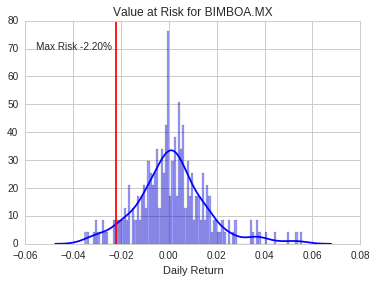

In [83]:
# Plotting value at risk for BIMBOA.MX
plot_value_risk(symbols['BIMBOA.MX'], 'BIMBOA.MX', 'Daily Return')

In [84]:
# The 0.05 empirical quantile of daily returns
returns['BIMBOA.MX'].quantile(0.05)

-0.021980872937780924

From the calculation above (it can change dependending on the day this script is ran) the 0.05 empirical quantile of daily returns is at **-0.021**. That means that with **_95% confidence_**, our worst daily loss will not exceed 2.1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.021 * \$1,000,000 = \$21,000.

### Method 2: Value at Risk Using the Monte Carlo Method

Using the _Monte Carlo Method_ to run many trials with random market conditions, now we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

More info: http://www.investopedia.com/terms/m/montecarlosimulation.asp

In [111]:
# Function to implement Monte Carlo
def stock_monte_carlo(start_price, days, mu, sigma):
    """This function simulates a prices array using the Monte Carlo Method"""
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift for Monte Carlo
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1, days):
        # Calculate shock
        # NOTE: We use random normal due to the stock distribution
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))        
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate simulated price
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] +  shock[x]))
    return price

# Function to iterate Monte Carlo for simulation
def monte_carlo_simulation(iterations, symbol, start_price, days, mu, sigma):
    for run in xrange(iterations):
        plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Monte Carlo Analysis for %s" % symbol, weight = "bold")
    
# Function to plot an histogram from the Monte Carlo simutation with the final price distribution
def final_price_distribution(iterations, symbol, start_price, days, mu, sigma):    
       
    # Plot the Monte Carlo Simulation
    monte_carlo_simulation(iterations, symbol, start_price, days, mu, sigma)
    
    # Create an empty matrix to hold the end price data
    simulations = np.zeros(iterations)
    
    # Set the print options of numpy to only display 0-5 points from an array to suppress output
    np.set_printoptions(threshold = 5)
    
    # Run the Monte Carlo simulation and take only the end price data to create an histogram for risk analysis
    for run in xrange(iterations):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]
    
    # Now we'll define "q" as the 1% emprical quantile, this means that 99% of the value should fall between here
    q = np.percentile(simulations, 1)
    
    # Now we plot the histogram for the distribution of the end prices
    plt.figure()
    plt.hist(simulations, bins = 100)
    
    # Next we add some extra information to the histogram
    
    # Starting price
    plt.figtext(0.6, 0.8, "Start Price: $%0.2f" % start_price)
    # Mean ending price
    plt.figtext(0.6, 0.7, "Mean Final Price: $%0.2f" % simulations.mean())
    # Variance of the price (Value at risk within 99% confidence interval)
    plt.figtext(0.6, 0.6, "VaR(0.99): $%0.2f" % (start_price - q))
    # Display 1% quantile
    plt.figtext(0.15, 0.6, "q(0.99): $%0.2f" % q)
    # Plot a line at the 1% quantile
    plt.axvline(x = q, linewidth = 4, color = "red")
    # Title
    plt.title(u"Final Price Distribution for %s Stock afte %s Days" % (symbol, days), weight = "bold")

In [112]:
# Analysis for BACHOCOB.MX

## Setting-up variables
days = 365 # Time horizon
dt = 1/days # Delta
mu = returns['BACHOCOB.MX'].mean() # The average for the expected return
sigma = returns['BACHOCOB.MX'].std() # The standar deviation for the expected return
start_price = symbols['BACHOCOB.MX']['Open'][0] # The first open price in our dataset

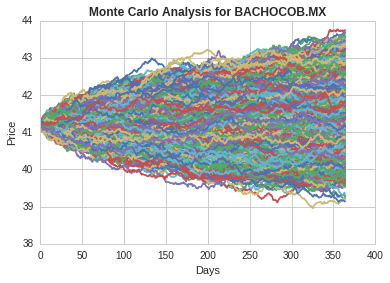

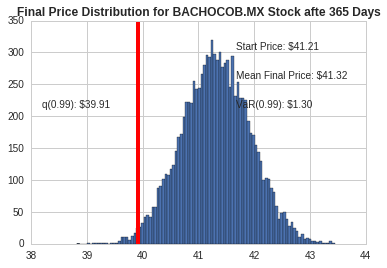

In [115]:
# Runing the Monte Carlo simulation with 1000 iterations
final_price_distribution(10000, 'BACHOCOB.MX', start_price, days, mu, sigma)

Base on the current data, now we have looked at the 1% empirical quantile of the final price distribution to estimate the **Value at Risk** for the BACHOCOB.MX stock, which looks to be \$2.59 (VaR[0.99]) for every investment of \$74.50 (the inital price of the stock).

This basically menas for every initial stock you purchase **you are putting about _\$2.59_ at risk 99% of the time** from our Monte Carlo Simulation.

In [113]:
# Analysis for BIMBOA.MX

## Setting-up variables
days = 365 # Time horizon
dt = 1/days # Delta
mu = returns['BIMBOA.MX'].mean() # The average for the expected return
sigma = returns['BIMBOA.MX'].std() # The standar deviation for the expected return
start_price = symbols['BIMBOA.MX']['Open'][0] # The first open price in our dataset

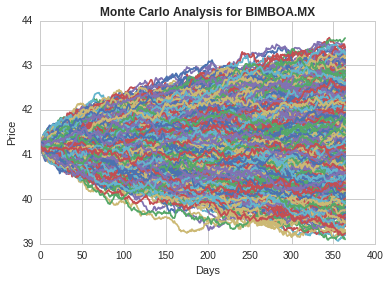

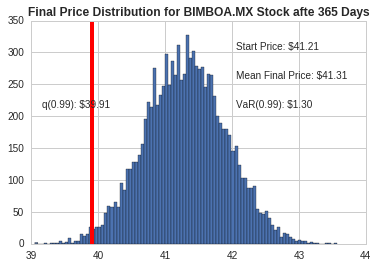

In [114]:
# Runing the Monte Carlo simulation with 1000 iterations
final_price_distribution(10000, 'BIMBOA.MX', start_price, days, mu, sigma)

Base on the current data, now we have looked at the 1% empirical quantile of the final price distribution to estimate the **Value at Risk** for the BIMBOA.MX stock, which looks to be \$1.30 (VaR[0.99]) for every investment of \$41.21 (the inital price of the stock).

This basically menas for every initial stock you purchase **you are putting about _\$1.30_ at risk 99% of the time** from our Monte Carlo Simulation.

## Conclusions

From this analysis of _BACHOCOB.MX_ and _BIMBOA.MX_ we can observe that, despite Bachoco apparently seems better since the stock value is higher, the price has been descreasing in the last year and it has a VaR higher than Bimbo, that in contrast, Bimbo's stock price has been constanly increasing the last year.

So we can conclude that at this time **it is better to but BIMBOA.MX stocks**.